In [66]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Read from CSV

df = pd.read_csv('Outputs/packets-tcp-rfc761-plaintext-dinamico-2021.09.27-processed')


In [68]:
# Setting global var

bytesize = 32
proto = 'TCP'
srcport = 80
encoding = 'plaintext'
text = 'HTTP'

In [69]:
# Add a new column to the end called 'flow'

df['flow'] = df['srcip'] + ':' + df.srcport.map(str) + ' -> ' + df['dstip'] + ':' + df.dstport.map(str)
# Read a specific location (R,C)
print('Example of flow {}'.format(df.iloc[5,10]))

Example of flow 192.168.0.1:80 -> 192.168.0.119:1054


In [70]:
# Sort dataframe by an index (column) and show

df = df.sort_values(['payload_size','flow'])
print(df.iloc[:,6:11])

     payload_size   shannon      bien     tbien  \
273             1 -0.000000  0.000000  0.000000   
219             5  0.530103  0.477113  0.860083   
245             5  0.530103  0.477113  0.860083   
288             5  0.530103  0.477113  0.860083   
222             5  0.530103  0.477113  0.860083   
..            ...       ...       ...       ...   
276          1460  0.297409  0.599001  0.978848   
277          1460  0.298132  0.594225  0.978804   
278          1460  0.299847  0.614111  0.979566   
280          1460  0.299349  0.565068  0.978128   
281          1460  0.294409  0.670219  0.979994   

                                     flow  
273  192.168.0.119:1051 -> 192.168.0.1:80  
219  192.168.0.1:80 -> 192.168.0.119:1060  
245  192.168.0.1:80 -> 192.168.0.119:1062  
288  192.168.0.1:80 -> 192.168.0.119:1064  
222  192.168.0.1:80 -> 192.168.0.119:1066  
..                                    ...  
276  192.168.0.1:80 -> 192.168.0.119:1078  
277  192.168.0.1:80 -> 192.168.0.11

In [71]:
# Filtering by port

is_port = df['srcport']==srcport
print(is_port.head())
df = df[is_port]

273    False
219     True
245     True
288     True
222     True
Name: srcport, dtype: bool


In [72]:
# Filtering by the number of packets of chosen size

is_bytes = df['payload_size']>2
print(is_bytes.head())
df = df[is_bytes]

219    True
245    True
288    True
222    True
229    True
Name: payload_size, dtype: bool


In [73]:
# Minimize number of displayed columns

# pd.set_option("display.max.columns", None)
# df.head()

In [74]:
# Aggregation by flow and each entropies mean

df[['flow','shannon','bien','tbien','payload_size']].groupby('flow').mean().sort_values('tbien', ascending=False)

,shannon,bien,tbien,payload_size
flow,,,,
192.168.0.1:80 -> 192.168.0.119:1074,0.459490,0.825880,0.983347,97.500000
192.168.0.1:80 -> 192.168.0.119:1045,0.450644,0.758350,0.980266,111.500000
192.168.0.1:80 -> 192.168.0.119:1031,0.451397,0.657500,0.979959,94.000000
192.168.0.1:80 -> 192.168.0.119:1061,0.443833,0.786182,0.979885,368.000000
192.168.0.1:80 -> 192.168.0.119:1037,0.418848,0.762728,0.979642,170.000000
192.168.0.1:80 -> 192.168.0.119:1054,0.446066,0.746885,0.979594,129.500000
192.168.0.1:80 -> 192.168.0.119:1038,0.430060,0.600449,0.978858,166.000000
192.168.0.1:80 -> 192.168.0.119:1068,0.403475,0.707959,0.978285,540.714286
192.168.0.1:80 -> 192.168.0.119:1052,0.422831,0.741490,0.978067,348.916667


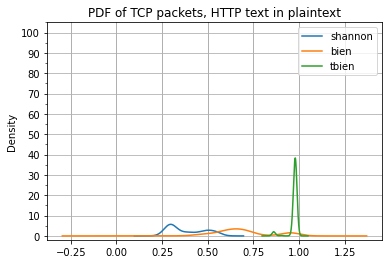

In [75]:
# Plot 1

title = 'PDF of {} packets, {} text in {}'.format(proto, text, encoding)
ax = df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='density',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,110,10)
yminortick = arange(0,110,5)
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )
plt.savefig('Plots/rfc761/{}{}{}density.png'.format(proto, encoding, text), transparent=False)


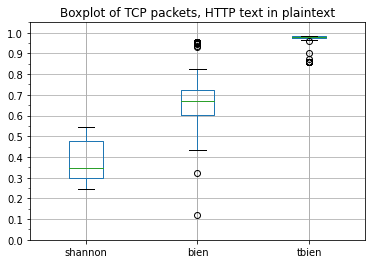

In [76]:
# Plot 2

title = 'Boxplot of {} packets, {} text in {}'.format(proto, text, encoding)
ax = df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='box',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,1.1,0.1)
yminortick = arange(0,1.1,0.05)
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )
plt.savefig('Plots/rfc761/{}{}{}box.png'.format(proto, encoding, text), transparent=False)

In [77]:
# Table of data

df = df.describe()
print(df)

       srcport      dstport  payload_size     shannon        bien       tbien
count    227.0   227.000000    227.000000  227.000000  227.000000  227.000000
mean      80.0  1055.942731    713.193833    0.383637    0.691736    0.972369
std        0.0    14.169370    641.910780    0.097720    0.152791    0.025999
min       80.0  1031.000000      5.000000    0.247437    0.120274    0.860083
25%       80.0  1051.000000     64.000000    0.296204    0.603715    0.975049
50%       80.0  1053.000000    433.000000    0.345913    0.671161    0.978244
75%       80.0  1067.500000   1460.000000    0.476424    0.722633    0.982645
max       80.0  1078.000000   1460.000000    0.546253    0.953186    0.985718


In [78]:
# Exporting new data

filename = 'Outputs/RFC761/{}{}{}data.csv'.format(proto, encoding, text)
df.to_csv(filename,',')